In [3]:
import pandas as pd
import numpy as np

In [4]:
da=pd.read_csv("delivery_time.csv")

In [5]:
da.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
da.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


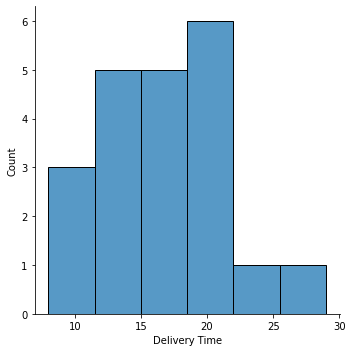

In [8]:
import seaborn as sns
sns.displot(da['Delivery Time'])

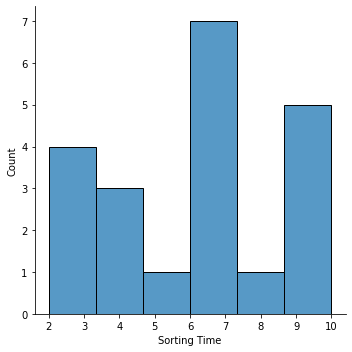

In [9]:
sns.displot(da['Sorting Time'])

In [11]:
import statsmodels.formula.api as smf
da= da.rename(columns={"Sorting Time":"Sorting"})
model = smf.ols('Q("Delivery Time")~Sorting',data = da).fit()


In [12]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [13]:
print(model.tvalues ,'\n',model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [15]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [19]:
newdata=da

In [22]:
pred=pd.DataFrame(newdata,columns=['Sorting'])

In [23]:
model.predict(pred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64